PCA Implementation


In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier


x = []
y = []
count = 1

for i in range(1,41):
  images = os.listdir('./drive/MyDrive/ORL dataset2/s'+str(i))
  count = 1
  for image in images:
    image_temp = np.array(Image.open('./drive/MyDrive/ORL dataset2/s'+str(i) +'/'+str(count)+'.pgm')).flatten()
    x.append(image_temp)
    y.append(str(i))
    count += 1

data = np.array(x)
data_ids = np.array(y)


training = np.empty((0,10304), int)
training_ids = np.array([])

testing = np.empty((0,10304), int)
testing_ids = np.array([])

for i in range(400):
  if i%2 != 0:
    training = np.vstack([training, data[i]])
    training_ids = np.append(training_ids, data_ids[i])
  else:
    testing = np.vstack([testing, data[i]])
    testing_ids = np.append(testing_ids, data_ids[i])



data_mean =  np.mean(data, axis=0)
data_z = data - data_mean

data_cov = np.dot(data_z.T, data_z) / len(data)
eigen_values, eigen_vectors = np.linalg.eigh(data_cov)

eigen_vectors = eigen_vectors.T

i = eigen_values.argsort()[::-1]
eigen_values = eigen_values[i]
eigen_vectors = eigen_vectors[:, i]

sum = np.sum(eigen_values)

alpha = np.array([0.8, 0.85, 0.9, 0.95])
fr = 0
r = [0, 0, 0, 0]

for i in range(4):
    temp_sum = 0
    while fr < alpha[i]:
        temp_sum += eigen_values[r[i]]
        fr = temp_sum / sum
        r[i] += 1

for i in range(4):

  projection_matrix = eigen_vectors[:, 0:r[i]]

  training_mean = np.mean(training)
  centered_training = training -  training_mean
  projected_training = np.dot(centered_training, projection_matrix)

  testing_mean = np.mean(testing)
  centered_testing = testing - testing_mean
  projected_testing = np.dot(centered_testing, projection_matrix)

  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(projected_training,training_ids)
  predicted= model.predict(projected_testing)
  
  accuracy = (np.sum(testing_ids == predicted) / len(testing_ids)) * 100
  print("Accuracy for alpha = ", alpha[i], "is ", str(accuracy), "%")



Accuracy for alpha =  0.8 is  88.0 %
Accuracy for alpha =  0.85 is  92.0 %
Accuracy for alpha =  0.9 is  93.0 %
Accuracy for alpha =  0.95 is  93.0 %


LDA Implementation


In [ ]:
# This is a sample Python script.
import os

from PIL import Image
import numpy as np
from numpy import linalg as la
from sklearn.neighbors import KNeighborsClassifier

Sb = 0
S = 0

mean_vector = np.mean(training, axis=0)
for i in range(len(np.unique(training_ids))):
    class_mean = np.mean(training[training == i + 1], axis=0)
    Sb += len(training[training == i + 1]) * np.outer((class_mean - mean_vector), (class_mean - mean_vector))
    Z = training[i:i + 10, :] - class_mean
    S += np.dot(Z.T, Z)


S_inv = la.inv(S)
evals, evecs = np.linalg.eigh(np.matmul(S_inv, Sb))

evecs = evecs.T

i = evals.argsort()[::-1]
evals = evals[i]
evecs = evecs[:, i]


projection_matrix_lda = evecs[:, 0:39]


training_mean = np.mean(training)
centered_training = training - training_mean
projected_training_lda = np.dot(centered_training, projection_matrix_lda)

testing_mean = np.mean(testing)
centered_testing = testing - testing_mean
projected_testing_lda = np.dot(centered_testing, projection_matrix_lda)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(projected_training_lda, training_ids)
predicted = model.predict(projected_testing_lda)

accuracy = (np.sum(testing_ids == predicted) / len(testing_ids)) * 100
print("LDA Accuracy =", str(accuracy), "%")

LDA Accuracy = 88.5 %


[88.0, 79.0, 78.0, 76.0]
[92.0, 82.0, 81.0, 76.5]
[93.0, 87.0, 81.0, 78.0]
[93.0, 86.0, 82.0, 79.5]


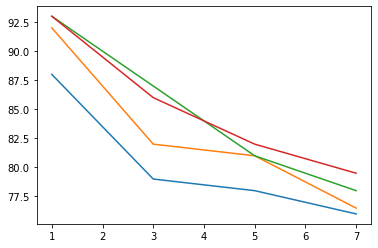

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
alpha = [0.8, 0.85, 0.9, 0.95]
k=[1,3,5,7]
for i in range(4) :
  accuracy1=[]
  for n in k :

    projection_matrix = eigen_vectors[:, 0:r[i]]

    training_mean = np.mean(training)
    centered_training = training -  training_mean
    projected_training = np.dot(centered_training, projection_matrix)

    testing_mean = np.mean(testing)
    centered_testing = testing - testing_mean
    projected_testing = np.dot(centered_testing, projection_matrix)
  
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(projected_training,training_ids)
    predicted= model.predict(projected_testing)
  
    accuracy = (np.sum(testing_ids == predicted) / len(testing_ids)) * 100
    accuracy1.append(accuracy)



  plt.plot(k,accuracy1, label = 'PCA, k = {}'.format(k))
  print(accuracy1)

Accuracy = 88.5 %
Accuracy = 75.5 %
Accuracy = 77.0 %
Accuracy = 72.0 %
[88.5, 75.5, 77.0, 72.0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


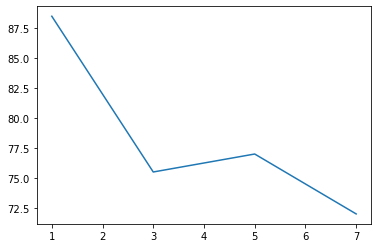

In [ ]:
import seaborn as sns
fig = plt.figure()
ax = plt.axes()
accuracy1=[]
k=[1,3,5,7]
for i in k :
  
 model = KNeighborsClassifier(n_neighbors=i)
 model.fit(projected_training_lda,training_ids)
 predicted= model.predict(projected_testing_lda)
  
 accuracy = (np.sum(testing_ids == predicted) / len(testing_ids)) * 100
 print("Accuracy =" , str(accuracy), "%")
 
 accuracy1.append(accuracy)
 

print(accuracy1) 
sns.lineplot(k,accuracy1)

In [ ]:
from cv2 import *

path = './drive/MyDrive/faces'
images = os.listdir(path)
data = []
labels = []
faces = []
nonfaces = []
Sb = 0
S = 0

for i in range(1, 41):
  my_path = path + '/' + str(i) + '.jpg'
  img = cv2.imread(my_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (92, 112), interpolation = cv2.INTER_LINEAR)
  img = img.flatten()
  data.append(img)
  labels.append('1')


path = './drive/MyDrive/nonfaces'
images = os.listdir(path)
for i in range(1, 41):
  my_path = path + '/' + str(i) + '.jpg'
  img = cv2.imread(my_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (92, 112), interpolation = cv2.INTER_LINEAR)
  img = img.flatten()
  data.append(img)
  labels.append('2')

data = np.array(data)
labels = np.array(labels)


training = np.empty((0,10304), int)
training_labels = []

testing = np.empty((0,10304), int)
testing_labels = []

for i in range(80):
  if i%2 != 0:
    training = np.vstack([training, data[i]])
    training_labels.append(labels[i])
  else:
    testing = np.vstack([testing, data[i]])
    testing_labels.append(labels[i])

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


mean_vector = np.mean(training, axis=0)
for i in range(len(np.unique(training_labels))):
    class_mean = np.mean(training[training == i + 1], axis=0)
    Sb += len(training[training == i + 1]) * np.outer((class_mean - mean_vector), (class_mean - mean_vector))
    Z = training[i:i + 20, :] - class_mean
    S += np.dot(Z.T, Z)

S_inv = la.inv(S)
evals, evecs = np.linalg.eigh(np.matmul(S_inv, Sb))

evecs = evecs.T

i = evals.argsort()[::-1]
evals = evals[i]
evecs = evecs[:, i]


testing_faces = testing[0:20]
testing_nonfaces = testing[20:40] 

projection_matrix_lda = evecs[:, 0:1]

training_mean = np.mean(training)
centered_training = training - training_mean
projected_training_lda = np.dot(centered_training, projection_matrix_lda)

testing_mean = np.mean(testing)

centered_testing = testing - testing_mean
projected_testing_lda = np.dot(centered_testing, projection_matrix_lda)

centered_faces = testing_faces - testing_mean
projected_testing_faces_lda = np.dot(centered_faces, projection_matrix_lda)

centered_nonfaces = testing_nonfaces - testing_mean
projected_testing_nonfaces_lda = np.dot(centered_nonfaces, projection_matrix_lda)


model = KNeighborsClassifier(n_neighbors=1)
model.fit(projected_training_lda, training_labels)

predicted_overall = model.predict(projected_testing_lda)
predicted_faces = model.predict(projected_testing_faces_lda)
predicted_nonfaces = model.predict(projected_testing_nonfaces_lda)


accuracy_overall = (np.sum(testing_labels == predicted_overall) / len(testing_labels)) * 100
accuracy_faces = (np.sum(testing_labels[0:20] == predicted_faces) / (len(testing_labels)/2)) * 100
accuracy_nonfaces = (np.sum(testing_labels[20:40] == predicted_nonfaces) / (len(testing_labels)/2)) * 100

print("Overall LDA Accuracy =", str(accuracy_overall), "%")
print("LDA faces Accuracy =", str(accuracy_faces), "%")
print("LDA non-faces Accuracy =", str(accuracy_nonfaces), "%")

print("Number of success cases: ",(accuracy_overall/100)*len(data))
print("Number of failure cases: ",len(data) - (accuracy_overall/100)*len(data))

Overall LDA Accuracy = 67.5 %
LDA faces Accuracy = 70.0 %
LDA non-faces Accuracy = 65.0 %
Number of success cases:  54.0
Number of failure cases:  26.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[72.0, 70.0, 68.57142857142857, 67.5]


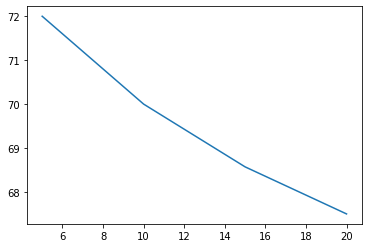

In [ ]:

nonfaces = []
accuracy_nonfaces= []

for i in range (5, 21, 5):
  testing_nonfaces = testing[0:(20 + i)]
  testing_labels_nonfaces= testing_labels[0:(20 + i)]

  nonfaces.append(i)

  centered_nonfaces = testing_nonfaces - testing_mean
  projected_testing_nonfaces_lda = np.dot(centered_nonfaces, projection_matrix_lda)


  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(projected_training_lda, training_labels)

  predicted_nonfaces = model.predict(projected_testing_nonfaces_lda)

  accuracy = (np.sum(testing_labels_nonfaces == predicted_nonfaces) / (len(testing_labels_nonfaces))) * 100

  accuracy_nonfaces.append(accuracy)


sns.lineplot(nonfaces, accuracy_nonfaces)
print(accuracy_nonfaces)

In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


x = []
y = []
count = 1

for i in range(1,41):
  images = os.listdir('./drive/MyDrive/ORL dataset2/s'+str(i))
  count = 1
  for image in images:
    image_temp = np.array(Image.open('./drive/MyDrive/ORL dataset2/s'+str(i) +'/'+str(count)+'.pgm')).flatten()
    x.append(image_temp)
    y.append(str(i))
    count += 1


data = np.array(x)
data_ids = np.array(y)


training_1 = np.empty((0,10304), int)
training_ids_1 = np.array([])

testing_1 = np.empty((0,10304), int)
testing_ids_1 = np.array([])

for i in range(400):
  if i%10 < 7:
    training_1 = np.vstack([training_1, data[i]])
    training_ids_1 = np.append(training_ids_1, data_ids[i])
  else:
    testing_1 = np.vstack([testing_1, data[i]])
    testing_ids_1 = np.append(testing_ids_1, data_ids[i])


data_mean =  np.mean(data, axis=0)
data_z = data - data_mean

data_cov = np.dot(data_z.T, data_z) / len(data)
eigen_values, eigen_vectors = np.linalg.eigh(data_cov)

eigen_vectors = eigen_vectors.T

i = eigen_values.argsort()[::-1]
eigen_values = eigen_values[i]
eigen_vectors = eigen_vectors[:, i]

sum = np.sum(eigen_values)

alpha = np.array([0.8, 0.85, 0.9, 0.95])
fr = 0
r = [0, 0, 0, 0]

for i in range(4):
  temp_sum = 0
  while fr < alpha[i]:
    temp_sum += eigen_values[r[i]]
    fr = temp_sum / sum
    r[i] += 1



  projection_matrix = eigen_vectors[:, 0:r[i]]

  training_mean_1 = np.mean(training_1)
  centered_training_1 = training_1 -  training_mean_1
  projected_training_1 = np.dot(centered_training_1, projection_matrix)

  testing_mean_1 = np.mean(testing_1)
  centered_testing_1 = testing_1 - testing_mean_1
  projected_testing_1 = np.dot(centered_testing_1, projection_matrix)

  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(projected_training_1,training_ids_1)
  predicted_1= model.predict(projected_testing_1)

  accuracy_1 = (np.sum(testing_ids_1 == predicted_1) / len(testing_ids_1)) * 100
  print("Accuracy for alpha = ", alpha[i], "is ", str(accuracy_1), "%")

Accuracy for alpha =  0.8 is  85.0 %
Accuracy for alpha =  0.85 is  89.16666666666667 %
Accuracy for alpha =  0.9 is  91.66666666666666 %
Accuracy for alpha =  0.95 is  92.5 %


[85.0, 82.5, 85.0, 80.83333333333333]
[89.16666666666667, 86.66666666666667, 84.16666666666667, 80.0]
[91.66666666666666, 90.0, 85.83333333333333, 84.16666666666667]
[92.5, 91.66666666666666, 88.33333333333333, 80.0]


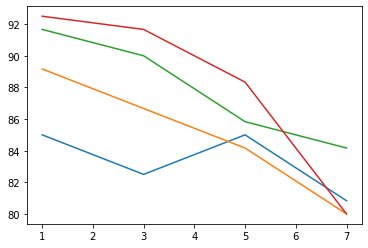

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
alpha = [0.8, 0.85, 0.9, 0.95]
k=[1,3,5,7]
for i in range(4) :
  accuracy1=[]
  for n in k :

    projection_matrix = eigen_vectors[:, 0:r[i]]

    training_mean = np.mean(training_1)
    centered_training = training_1 -  training_mean
    projected_training = np.dot(centered_training, projection_matrix)

    testing_mean = np.mean(testing_1)
    centered_testing = testing_1 - testing_mean
    projected_testing = np.dot(centered_testing, projection_matrix)
  
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(projected_training,training_ids_1)
    predicted= model.predict(projected_testing)
  
    accuracy = (np.sum(testing_ids_1 == predicted) / len(testing_ids_1)) * 100
    accuracy1.append(accuracy)



  plt.plot(k,accuracy1, label = 'PCA, k = {}'.format(k))
  print(accuracy1)

In [ ]:
from PIL import Image
import numpy as np
from numpy import linalg as la

import os
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

x = []
y = []
count = 1
for i in range(1,41):
  images = os.listdir('./drive/MyDrive/ORL dataset2/s'+str(i))
  count = 1
  for image in images:
    image_temp = np.array(Image.open('./drive/MyDrive/ORL dataset2/s'+str(i) +'/'+str(count)+'.pgm')).flatten()
    x.append(image_temp)
    y.append(str(i))
    count += 1


data = np.array(x)
data_ids = np.array(y)



training = np.empty((0,10304), int)
training_ids = np.array([])

testing = np.empty((0,10304), int)
testing_ids = np.array([])


for i in range(400):
  if i%10 < 7:
    training = np.vstack([training, data[i]])
    training_ids = np.append(training_ids, data_ids[i])
  else:
    testing = np.vstack([testing, data[i]])
    testing_ids = np.append(testing_ids, data_ids[i])



Sb = 0
S = 0

mean_vector = np.mean(training, axis=0)
for i in range(len(np.unique(training_ids))):
    class_mean = np.mean(training[training == i + 1], axis=0)
    Sb += len(training[training == i + 1]) * np.outer((class_mean - mean_vector), (class_mean - mean_vector))
    Z = training[i:i + 7, :] - class_mean
    S += np.dot(Z.T, Z)


S_inv = la.inv(S)
evals, evecs = np.linalg.eigh(np.matmul(S_inv, Sb))

evecs = evecs.T

i = evals.argsort()[::-1]
evals = evals[i]
evecs = evecs[:, i]

projection_matrix = evecs[:, 0:39]


training_mean = np.mean(training)
centered_training = training -  training_mean
projected_training = np.dot(centered_training, projection_matrix)


testing_mean = np.mean(testing)
centered_testing = testing - testing_mean
projected_testing = np.dot(centered_testing, projection_matrix)


model = KNeighborsClassifier(n_neighbors=1)
model.fit(projected_training,training_ids)
predicted= model.predict(projected_testing)
  
accuracy = (np.sum(testing_ids == predicted) / len(testing_ids)) * 100
print("Accuracy =" , str(accuracy), "%")

Accuracy = 87.5 %
